In [2]:
import pandas as pd
import statistics
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import warnings
import ast
warnings.filterwarnings('ignore')

In [7]:
PREFIX = '/mnt/align4_drive/arunas/broca/'

og = pd.read_csv(f'{PREFIX}/data-gen/ngs.csv')
gCols = [col for col in og.columns if not 'ng-' in col]
f = pd.read_csv(f'/mnt/align4_drive/arunas/broca/llama/experiments/new-prompt-prologue-random-seed/{gCols[0]}.csv')
m = pd.read_csv(f'/mnt/align4_drive/arunas/broca/mistral/experiments/new-prompt-prologue-random-seed/{gCols[0]}.csv')
# g = pd.read_csv('/home/gridsan/arunas/broca/llama/experiments/llama-classification-train-test-acc.csv')
for col in gCols[1:]:
    f = pd.concat([f, pd.read_csv(f'/mnt/align4_drive/arunas/broca/llama/experiments/new-prompt-prologue-random-seed/{col}.csv')])
    m = pd.concat([m, pd.read_csv(f'/mnt/align4_drive/arunas/broca/mistral/experiments/new-prompt-prologue-random-seed/{col}.csv')])


In [53]:
new_names = {'en': 'EN declarative (R)',
'en-r-1-subordinate': 'EN subordinate (R)',
'en-r-2-passive': 'EN passive (R)',
'en-u-1-negation': 'EN negative token (U)',
'en-u-2-inversion':'EN inverted (U)',
'en-u-3-qsubordinate':'EN qsubordinate (U)',
'en-u-4-wh':'EN-wh-word (U)',
'it':'$IT_S$ declarative (R)',
'it-r-1-null_subject':'$IT_S$ null subject (R)',
'it-r-2-passive':'$IT_S$ passive (R)',
'it-r-3-subordinate':'$IT_S$ subordinate (R)',
'it-u-1-negation':'$IT_S$ negative token (U)',
'it-u-2-invert':'$IT_S$ inverted (U)',
'it-u-3-gender':'$IT_S$ gender determiner (U)',
'ita':'$IT_T$ declarative (R)',
'ita-r-1-null_subject':'$IT_T$ null subject (R)',
'ita-r-3-passive':'$IT_T$ passive (R)',
'ita-r-2-subordinate':'$IT_T$ subordinate (R)',
'ita-u-1-negation':'$IT_T$ negative (U)',
'ita-u-2-invert':'$IT_T$ inverted (U)',
'ita-u-3-gender':'$IT_T$ gender determiner (U)',
'jap-r-1-sov':'$JP_T$ declarative (R)',
'jap-r-2-passive':'$JP_T$ passive (R)',
'jap-u-1-negation':'$JP_T$ negative token(U)',
'jap-u-2-invert':'$JP_T$ inverted (U)',
'jp-r-1-sov':'$JP_S$ declarative (R)',
'jp-r-2-passive':'$JP_S$ passive (R)',
'jp-r-3-subordinate':'$JP_S$ subordinate (R)',
'jp-u-1-negation':'$JP_S$ negative token (U)',
'jp-u-2-invert':'$JP_S$ inverted (U)',
'jp-u-3-past-tense':'$JP_S$ incorrect past tense (U)'}

counts =  [ {'r': 3, 'u':4}, {'r': 4, 'u':3}, {'r': 4, 'u':3}, {'r': 2, 'u':2}, {'r': 3, 'u':3}]
colors = []
m_colors = { 'r': '#87CEFA', 'u': '#FFB6A0' }
l_colors = { 'r': '#007FFF', 'u': '#E55451' }
for c in counts:
    cur_real = c['r']
    cur_unreal = c['u']
    while (cur_real > 0):
        cur_real -= 1
        colors.append(l_colors['r'])
        colors.append(m_colors['r'])
    while (cur_unreal > 0):
        cur_unreal -= 1
        colors.append(l_colors['u'])
        colors.append(m_colors['u'])

['ita', 'ita-r-1-null_subject', 'ita-r-2-subordinate', 'ita-r-3-passive', 'ita-u-1-negation', 'ita-u-2-invert', 'ita-u-3-gender', 'en', 'en-r-1-subordinate', 'en-r-2-passive', 'en-u-1-negation', 'en-u-2-inversion', 'en-u-3-qsubordinate', 'en-u-4-wh', 'it', 'it-r-1-null_subject', 'it-r-2-passive', 'it-r-3-subordinate', 'it-u-1-negation', 'it-u-2-invert', 'it-u-3-gender', 'jp-r-1-sov', 'jap-r-1-sov', 'jp-r-2-passive', 'jap-r-2-passive', 'jp-r-3-subordinate', 'jp-u-1-negation', 'jap-u-1-negation', 'jp-u-2-invert', 'jap-u-2-invert', 'jp-u-3-past-tense']


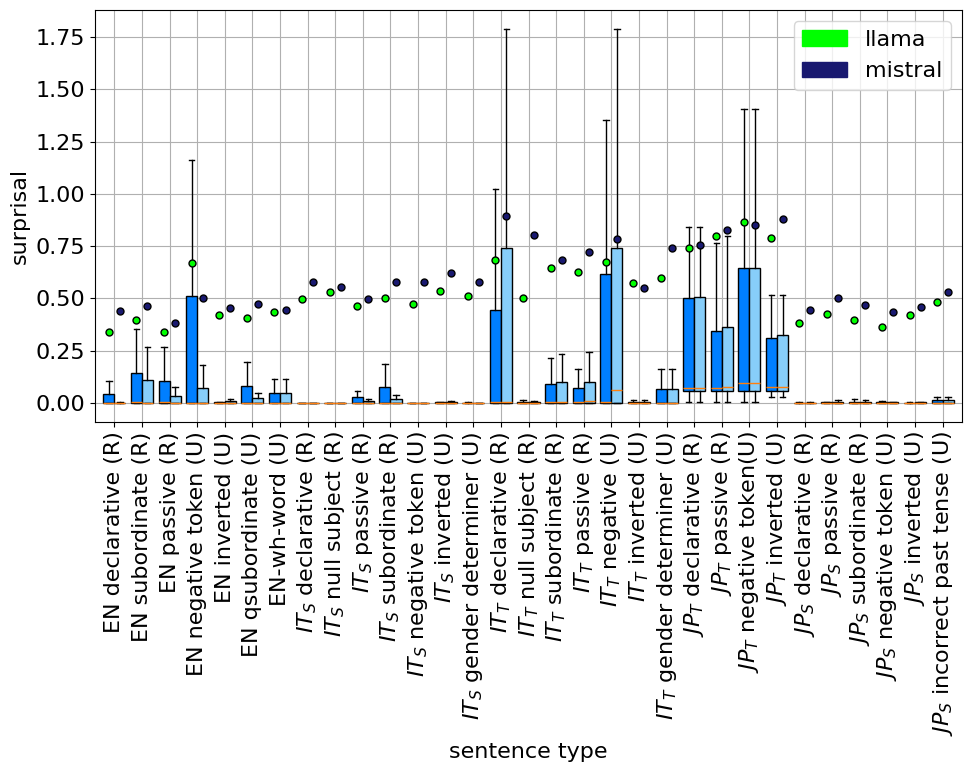

In [54]:
def get_surps(f):
    surps = []
    for idx, row in f.iterrows():
        myList = []
        for i in list(ast.literal_eval(row['surprisal'])):
            myList.append(i[1])
        surps.append(myList)
    all_surps = np.array([i for s in surps for i in s])
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 20}
    return sorted(all_surps)

ldiff_surps = []
mdiff_surps = []
sfig, ax = plt.subplots(figsize=(10, 8))
print(gCols)
for sent_type_idx, sent_type in enumerate(sorted(f['type'].unique())):
    lg_surps = get_surps(f[(f['type'] == sent_type) & (f['gold'] == 'Yes')])
    lug_surps = get_surps(f[(f['type'] == sent_type) & (f['gold'] == 'No')])
    mg_surps = get_surps(m[(m['type'] == sent_type) & (m['gold'] == 'Yes')])
    mug_surps = get_surps(m[(m['type'] == sent_type) & (m['gold'] == 'No')])

    ldiff_surps.append(lg_surps)
    mdiff_surps.append(lug_surps)
    # ldiff_surps.append([ lug_surps[idx] - lg_surps[idx]  for idx in range(min(len(lg_surps), len(lug_surps)))])
    # mdiff_surps.append([ mug_surps[idx] - mg_surps[idx] for idx in range(min(len(mg_surps), len(mug_surps))) ])

plt.grid()
# matplotlib.rc('font', **font)

positions = np.arange(1, len(gCols) + 1)

for i in range(len(gCols)):
    bp = plt.boxplot([ldiff_surps[i], mdiff_surps[i]], positions=[positions[i], positions[i] + 0.4], 
                widths=0.4, autorange=True, patch_artist=True, showfliers=False, vert=True, showmeans=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    for mean, color in zip([bp['means'][0], bp['means'][1]], ['lime', 'midnightblue']):
        mean.set(markerfacecolor=color, marker='o', markersize=5, markeredgecolor="black")

plt.xlabel("sentence type")
plt.xticks(positions + 0.2, [new_names[col] for col in sorted(gCols)], rotation=90)
plt.ylabel("surprisal")
legend_handles = [plt.Rectangle((0,0),0.5,0.5, color='lime'), plt.Rectangle((0,0),0.5,0.5, color='midnightblue')]
plt.legend(legend_handles, ['llama', 'mistral'])

sfig.tight_layout()
# sfig.savefig('/home/gridsan/arunas/broca/llama-mistral-ug-g-diff-surprisals.png')
plt.show()

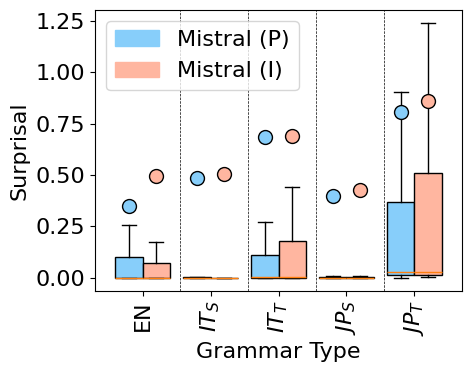

In [41]:
plt.rcParams.update({'font.size': 16})  #
def get_surps(f, cols):
    ur_surps = []
    g_surps = []
    for col in cols:
        if ('-u-' in col):
            for idx, row in f[(f['type'] == col) & (f['gold'] == 'Yes')].iterrows():
                myList = []
                for i in list(ast.literal_eval(row['surprisal'])):
                    myList.append(i[1])
                ur_surps.append(myList)
        else:
            for idx, row in f[(f['type'] == col) & (f['gold'] == 'Yes')].iterrows():
                myList = []
                for i in list(ast.literal_eval(row['surprisal'])):
                    myList.append(i[1])
                g_surps.append(myList)
                
    allg_surps = np.array([i for s in g_surps for i in s])
    allug_surps = np.array([i for s in ur_surps for i in s])
    return sorted(allg_surps), sorted(allug_surps)

ldiff_surps = []
mdiff_surps = []
sfig, ax = plt.subplots(figsize=(5, 5))

en_real, en_unreal = get_surps(m, ['en', 'en-r-1-subordinate', 'en-r-2-passive', 'en-u-1-negation', 'en-u-2-inversion', 'en-u-3-qsubordinate'])
it_real, it_unreal = get_surps(m, ['it', 'it-r-1-null_subject', 'it-r-2-passive', 'it-r-3-subordinate', 'it-u-1-negation', 'it-u-2-invert', 'it-u-3-gender'])
ita_real, ita_unreal = get_surps(m, ['ita', 'ita-r-1-null_subject', 'ita-r-2-subordinate', 'ita-r-3-passive', 'ita-u-1-negation', 'ita-u-2-invert', 'ita-u-3-gender'])
jap_real, jap_unreal = get_surps(m, ['jap-r-1-sov','jap-r-2-passive','jap-u-1-negation','jap-u-2-invert'])
jp_real, jp_unreal = get_surps(m, ['jp-r-1-sov', 'jp-r-2-passive', 'jp-r-3-subordinate', 'jp-u-1-negation', 'jp-u-2-invert', 'jp-u-3-past-tense'])
reals = [en_real, it_real, ita_real, jp_real, jap_real]
unreals = [en_unreal, it_unreal, ita_unreal, jp_unreal, jap_unreal]
# plt.grid()
# matplotlib.rc('font', **font)

positions = np.arange(1, len(reals) + 1)

for i in range(len(reals)):
    bp = plt.boxplot([reals[i], unreals[i]], positions=[positions[i], positions[i] + 0.4], 
                widths=0.4, autorange=True, patch_artist=True, showfliers=False, vert=True, showmeans=True)
    for patch, color in zip(bp['boxes'], ['#87CEFA', '#FFB6A0']):
        patch.set_facecolor(color)

    for mean, color in zip([bp['means'][0], bp['means'][1]], ['#87CEFA', '#FFB6A0']):
        mean.set(markerfacecolor=color, marker='o', markersize=10, markeredgecolor="black")

plt.xlabel("Grammar Type")
plt.xticks(positions + 0.2, ['EN', '$IT_S$', '$IT_T$', '$JP_S$', '$JP_T$'], rotation=90)
plt.ylabel("Surprisal")
plt.axvline(x=1.75, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=2.75, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=3.75, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=4.75, color='black', linestyle='--', linewidth=0.5)
legend_handles = [plt.Rectangle((0,0),1,1, color='#87CEFA'), plt.Rectangle((0,0),1,1, color='#FFB6A0')]
plt.legend(legend_handles, ['Mistral (P)', 'Mistral (I)'], loc='upper left')

sfig.tight_layout()
sfig.savefig('/mnt/align4_drive/arunas/broca/mistral/experiments/new-prompt-prologue-random-seed/mistral-surprisals.png')
plt.show()

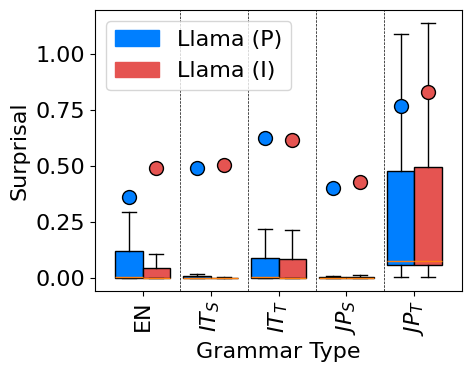

In [44]:
plt.rcParams.update({'font.size': 16})
def get_surps(f, cols):
    ur_surps = []
    g_surps = []
    for col in cols:
        if ('-u-' in col):
            for idx, row in f[(f['type'] == col) & (f['gold'] == 'Yes')].iterrows():
                myList = []
                for i in list(ast.literal_eval(row['surprisal'])):
                    myList.append(i[1])
                ur_surps.append(myList)
        else:
            for idx, row in f[(f['type'] == col) & (f['gold'] == 'Yes')].iterrows():
                myList = []
                for i in list(ast.literal_eval(row['surprisal'])):
                    myList.append(i[1])
                g_surps.append(myList)
                
    allg_surps = np.array([i for s in g_surps for i in s])
    allug_surps = np.array([i for s in ur_surps for i in s])
    return sorted(allg_surps), sorted(allug_surps)

ldiff_surps = []
mdiff_surps = []
sfig, ax = plt.subplots(figsize=(5, 4))

en_real, en_unreal = get_surps(f, ['en', 'en-r-1-subordinate', 'en-r-2-passive', 'en-u-1-negation', 'en-u-2-inversion', 'en-u-3-qsubordinate'])
it_real, it_unreal = get_surps(f, ['it', 'it-r-1-null_subject', 'it-r-2-passive', 'it-r-3-subordinate', 'it-u-1-negation', 'it-u-2-invert', 'it-u-3-gender'])
ita_real, ita_unreal = get_surps(f, ['ita', 'ita-r-1-null_subject', 'ita-r-2-subordinate', 'ita-r-3-passive', 'ita-u-1-negation', 'ita-u-2-invert', 'ita-u-3-gender'])
jap_real, jap_unreal = get_surps(f, ['jap-r-1-sov','jap-r-2-passive','jap-u-1-negation','jap-u-2-invert'])
jp_real, jp_unreal = get_surps(f, ['jp-r-1-sov', 'jp-r-2-passive', 'jp-r-3-subordinate', 'jp-u-1-negation', 'jp-u-2-invert', 'jp-u-3-past-tense'])
reals = [en_real, it_real, ita_real, jp_real, jap_real]
unreals = [en_unreal, it_unreal, ita_unreal, jp_unreal, jap_unreal]



positions = np.arange(1, len(reals) + 1)

for i in range(len(reals)):
    bp = plt.boxplot([reals[i], unreals[i]], positions=[positions[i], positions[i] + 0.4], 
                widths=0.4, autorange=True, patch_artist=True, showfliers=False, vert=True, showmeans=True)
    for patch, color in zip(bp['boxes'], ['#007FFF', '#E55451']):
        patch.set_facecolor(color)

    for mean, color in zip([bp['means'][0], bp['means'][1]], ['#007FFF', '#E55451']):
        mean.set(markerfacecolor=color, marker='o', markersize=10, markeredgecolor="black")

plt.xlabel("Grammar Type")
plt.xticks(positions + 0.2, ['EN', '$IT_S$', '$IT_T$', '$JP_S$', '$JP_T$'], rotation=90)
plt.ylabel("Surprisal")
legend_handles = [plt.Rectangle((0,0),1,1, color='#007FFF'), plt.Rectangle((0,0),1,1, color='#E55451')]
plt.legend(legend_handles, ['Llama (P)', 'Llama (I)'], loc='upper left')
plt.axvline(x=1.75, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=2.75, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=3.75, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=4.75, color='black', linestyle='--', linewidth=0.5)
sfig.tight_layout()
sfig.savefig('/mnt/align4_drive/arunas/broca/llama/experiments/new-prompt-prologue-random-seed/llama-surprisals.png')
plt.show()